<a href='https://www.kaggle.com/code/andls555/heart-disease-prediction'>Data Link</a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart_2020_cleaned.csv')

In [45]:
# Cleaning the Data (Mostly Cleaned)

df['Race'].replace('American Indian/Alaskan Native', 'Native', inplace=True)
df['Diabetic'].replace('No, borderline diabetes', 'borderline', inplace=True)
df['Diabetic'].replace('Yes (during pregnancy)', 'GDM', inplace=True)

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [46]:
# Basic Data Info

display(df.describe())
print('')
df.info()
print('')
df.nunique()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     3

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

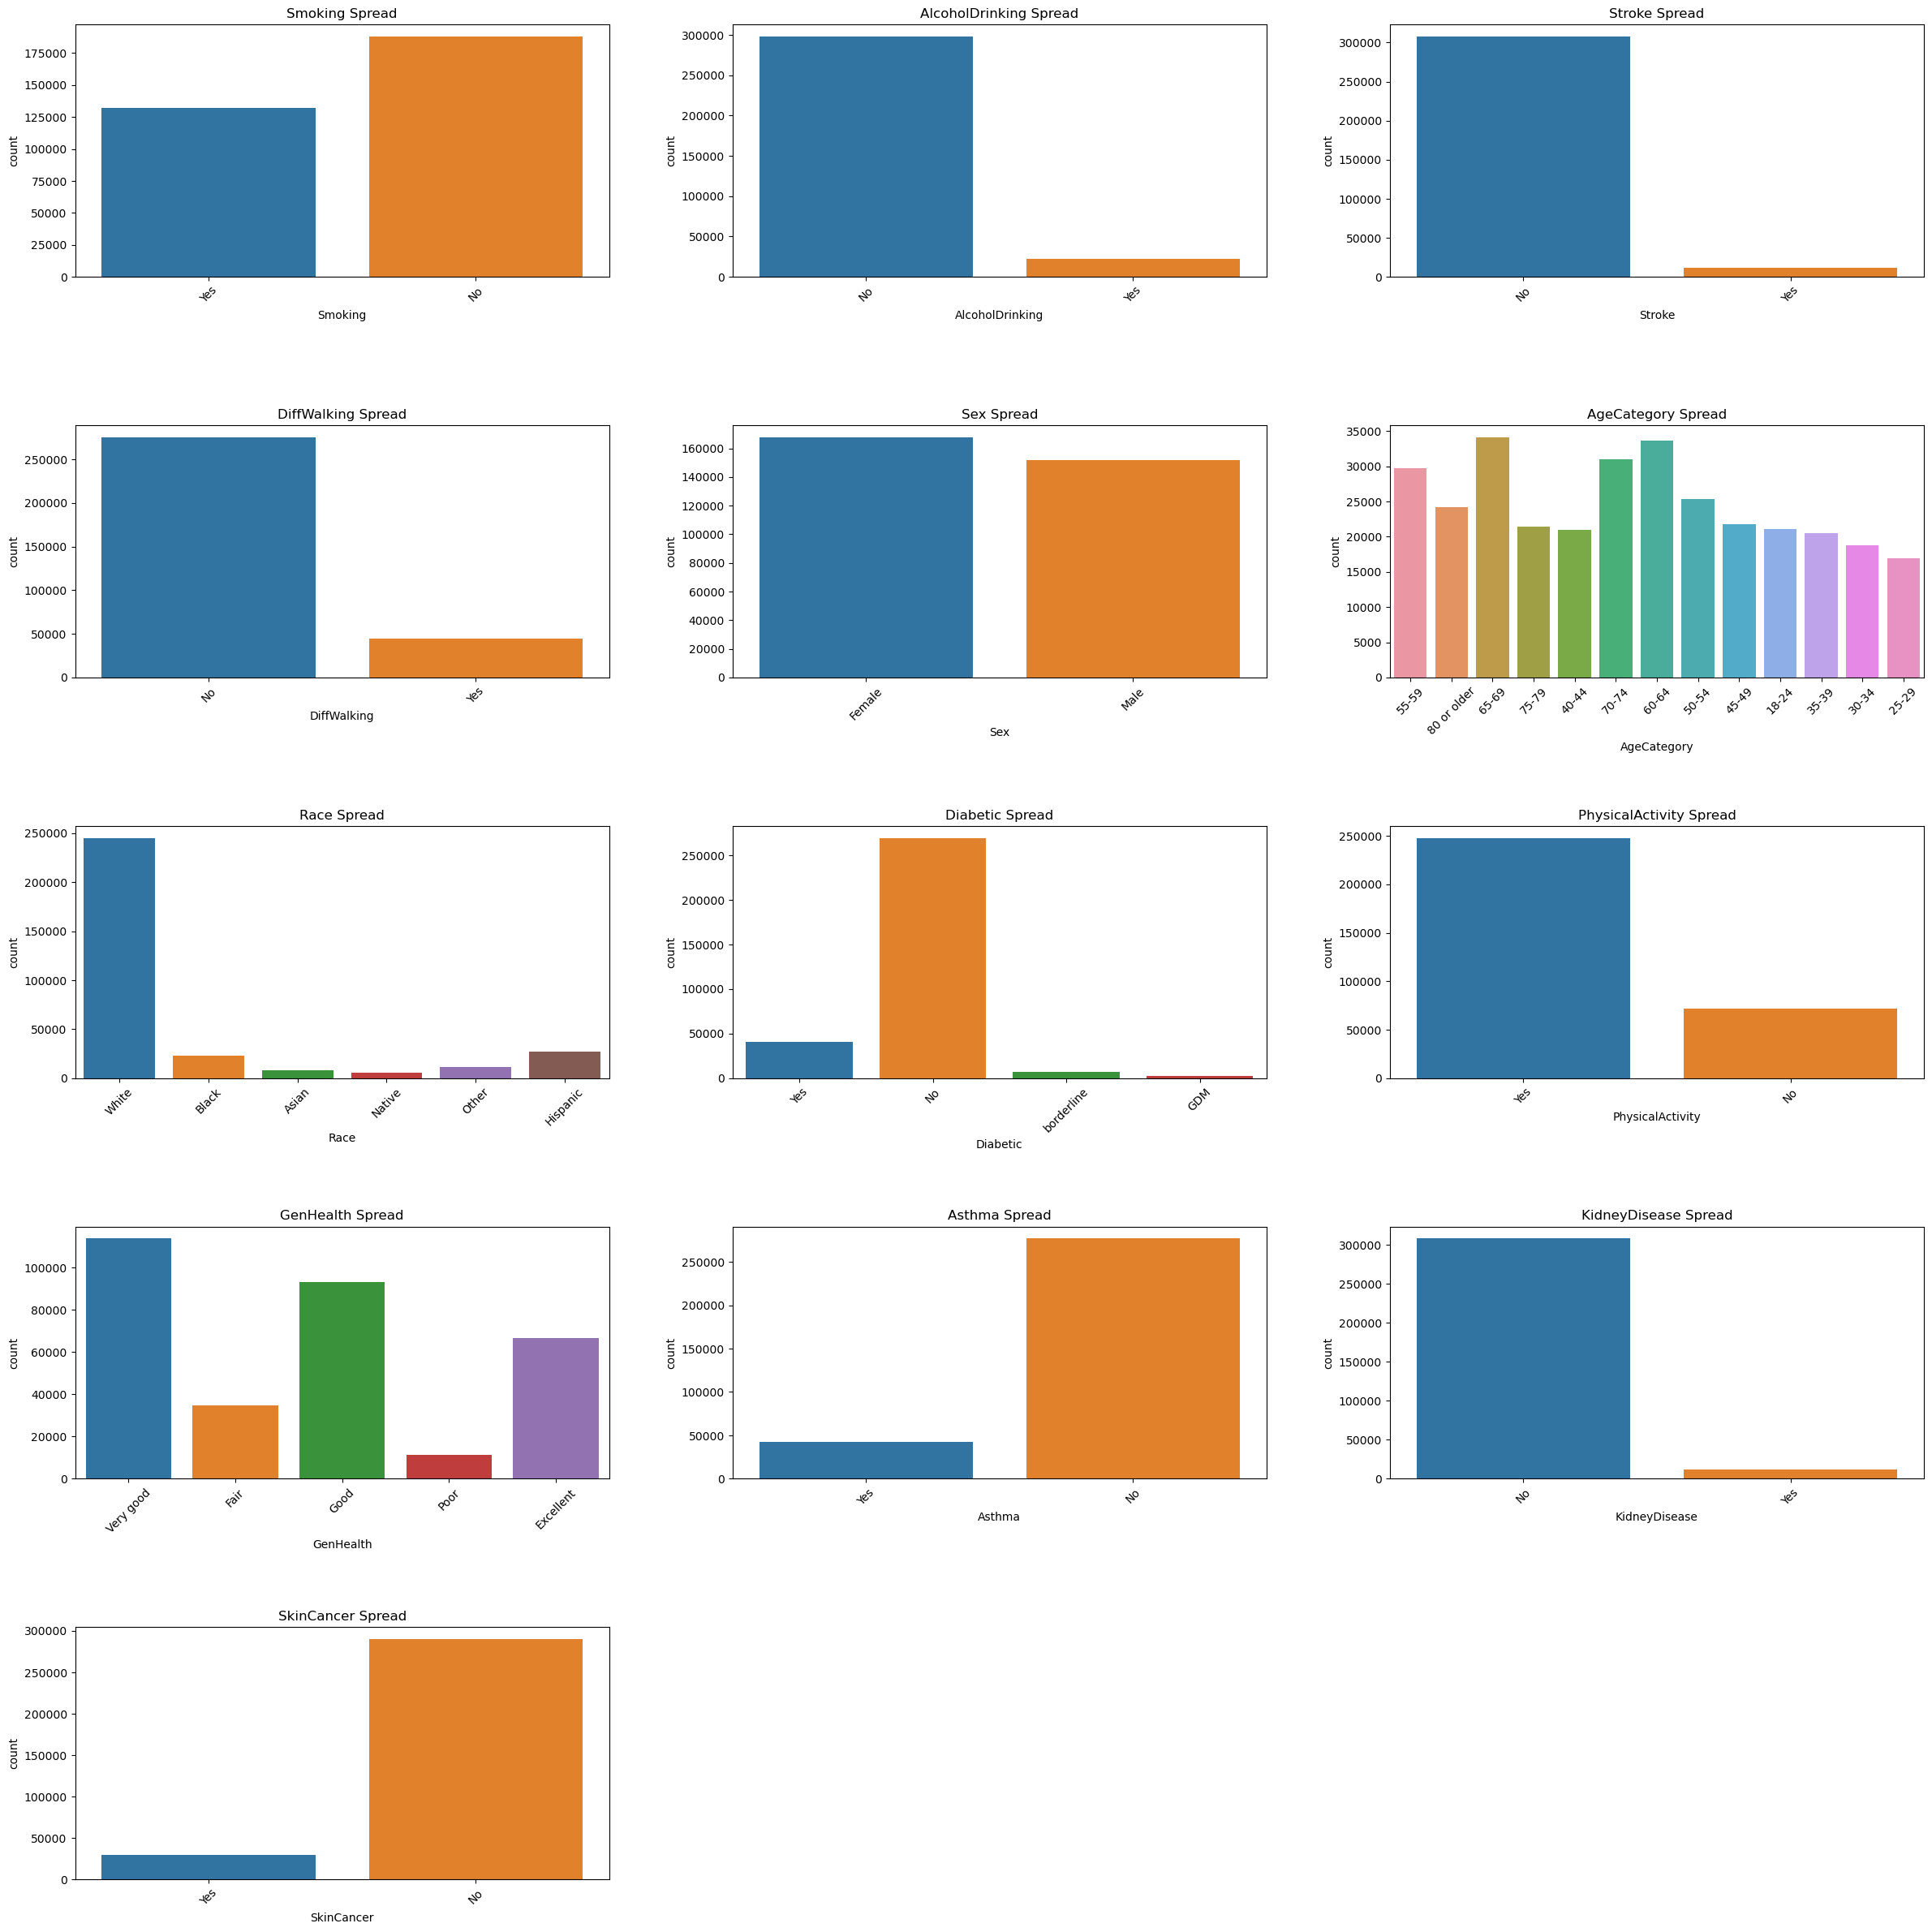

In [47]:
# Looking at Basic Spread of Categorical Data

parsing_columns = []

def addParsingColumns():
    for column in df:
        if df[column].dtype == object:
            parsing_columns.append(column)

    parsing_columns.remove('HeartDisease')

addParsingColumns()

def dataFrameValueCounts():
    for i in enumerate(parsing_columns):
        vc = pd.DataFrame(df[i[1]].value_counts())
        convertPercent = lambda x: x * 100 /  vc['count'].sum()
        vc['Percent'] = vc['count'].apply(convertPercent)
        display(vc)

def categoricalDistPlots():
    ax = plt.figure(figsize=(25, 25))

    for i in enumerate(parsing_columns):
        plt.subplot(5, 3, i[0]+1)
        sns.countplot(data=df, x=i[1])
        plt.xticks(rotation=45)
        plt.title(i[1] + ' Spread')

    ax.tight_layout(pad=5)
    plt.show()

categoricalDistPlots()

,count,percent
HeartDisease,,
No,292422,0.914405
Yes,27373,0.085595


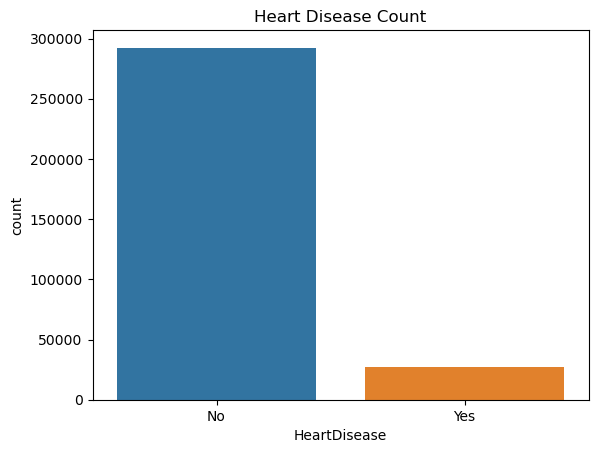

In [48]:
# Looking at Overall Distribution of Heart Disease Counts

def getHeartDiseaseSpread():
    vc = pd.DataFrame(df['HeartDisease'].value_counts())
    vc['percent'] = vc['count'] / vc['count'].sum()
    display(vc)
    sns.countplot(x='HeartDisease', data=df)
    plt.title('Heart Disease Count')
    
getHeartDiseaseSpread()

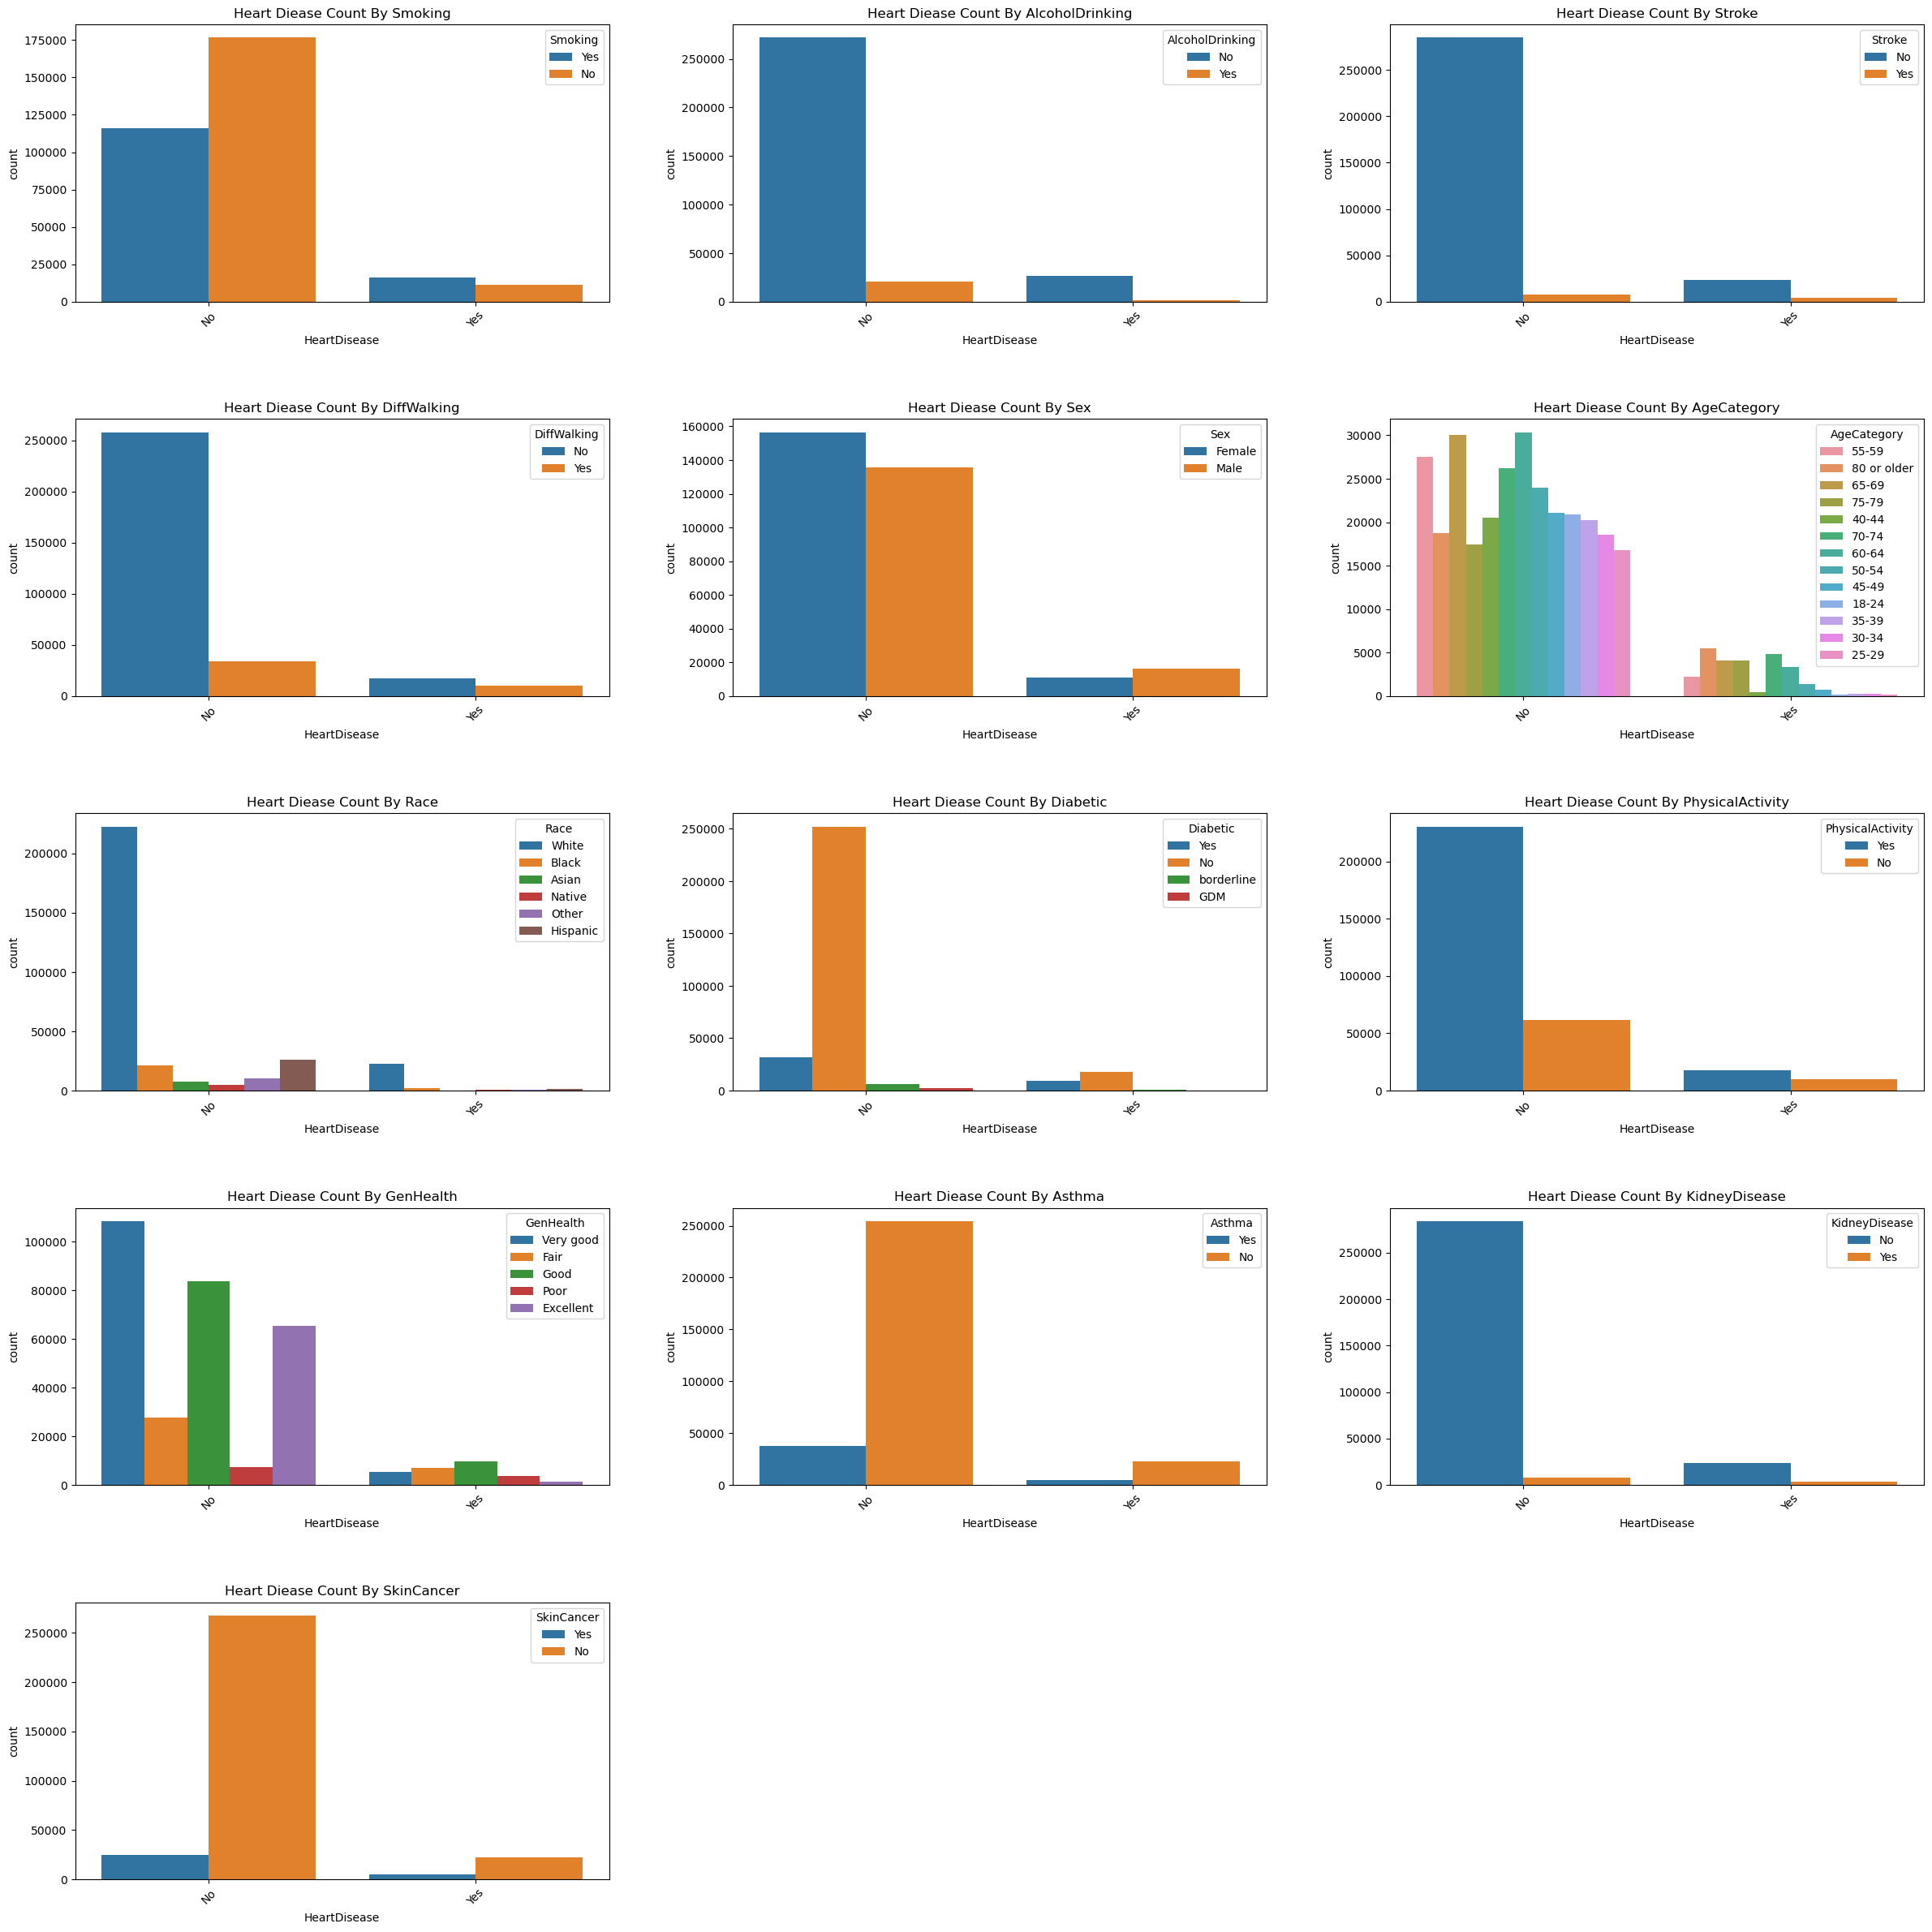

In [49]:
def heartDiseaseCausePlots():
    ax = plt.figure(figsize=(25, 25))

    for i in enumerate(parsing_columns):
        plt.subplot(5, 3, i[0]+1)
        sns.countplot(data=df, x='HeartDisease', hue=i[1])
        plt.xticks(rotation=45)
        plt.title('Heart Diease Count By ' + i[1])
    
    ax.tight_layout(pad=5)
    plt.show()

def groupCategorically():
    for column in parsing_columns:
        vc = df.groupby([column, 'HeartDisease']).count()
        vc.drop(columns=vc.columns[1:16], inplace=True)
        vc.rename(columns={'BMI': 'Count'}, inplace=True)
        vc['Percent'] = (vc['Count'] / vc['Count'].sum()) * 100
        display(vc)

heartDiseaseCausePlots()

,BMI,MentalHealth,PhysicalHealth,SleepTime
HeartDisease,,,,
No,28.224658,3.828778,2.956416,7.093416
Yes,29.401592,4.641764,7.808242,7.136156


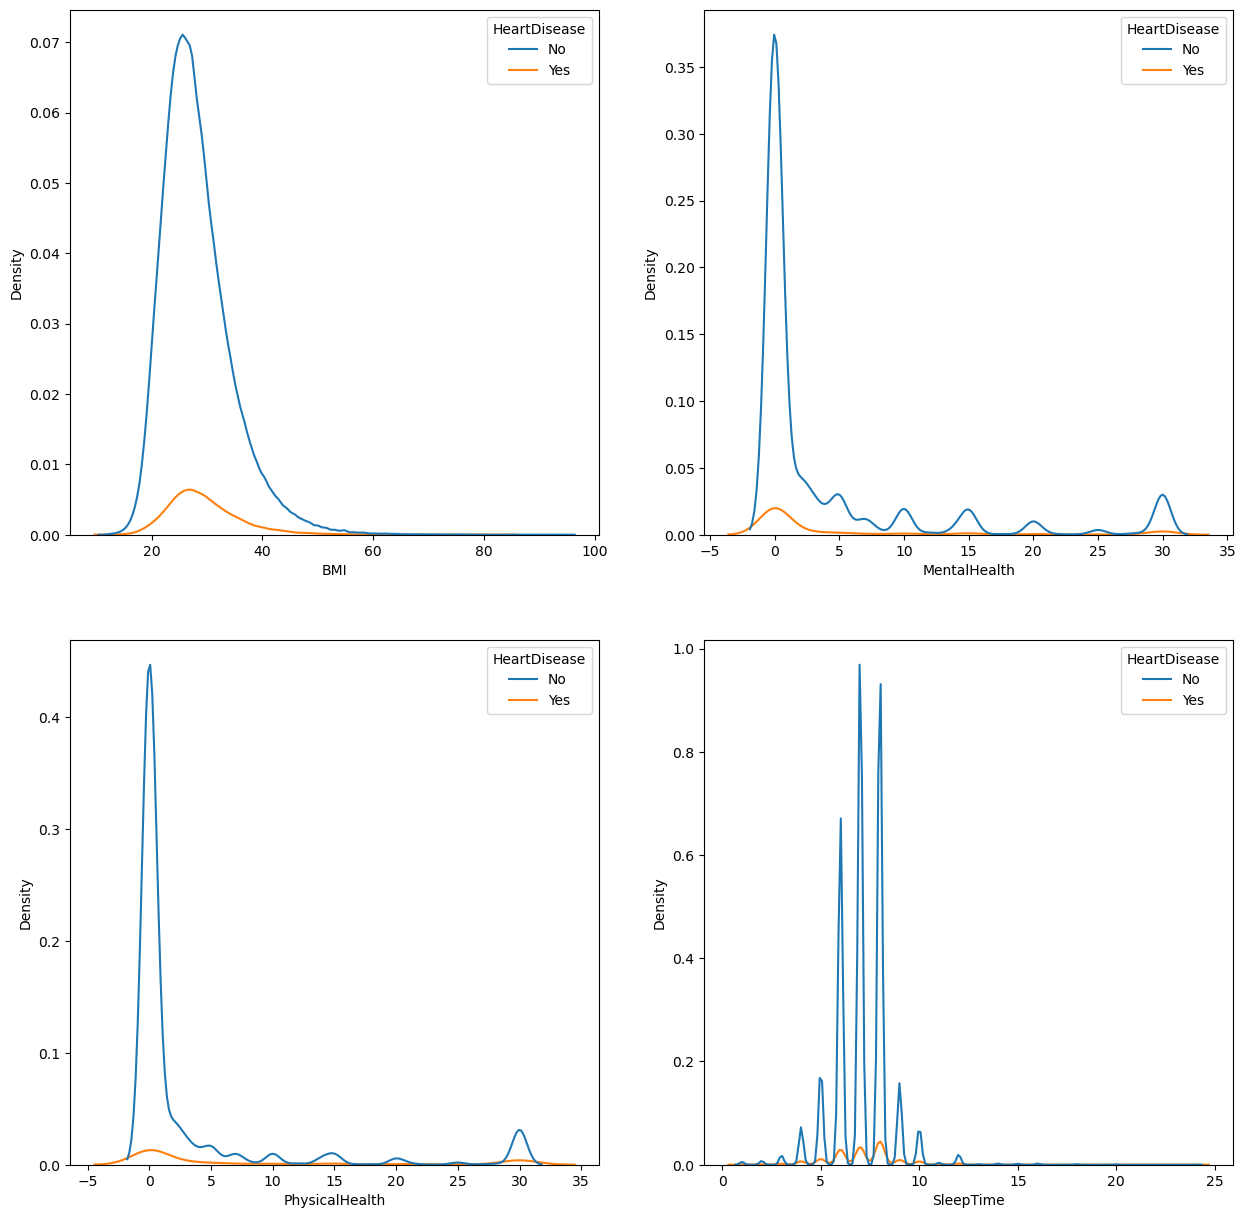

In [50]:
ax = plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.kdeplot(x = 'BMI', data=df, hue='HeartDisease')

plt.subplot(2, 2, 2)
sns.kdeplot(x = 'MentalHealth', data=df, hue='HeartDisease')

plt.subplot(2, 2, 3)
sns.kdeplot(x = 'PhysicalHealth', data=df, hue='HeartDisease')

plt.subplot(2, 2, 4)
sns.kdeplot(x = 'SleepTime', data=df, hue='HeartDisease')

groupedByHeartDisease = df[['BMI', 'MentalHealth', 'PhysicalHealth', 'SleepTime', 'HeartDisease']].groupby('HeartDisease').mean()
groupedByHeartDisease.head()

<Axes: xlabel='BMI', ylabel='Count'>

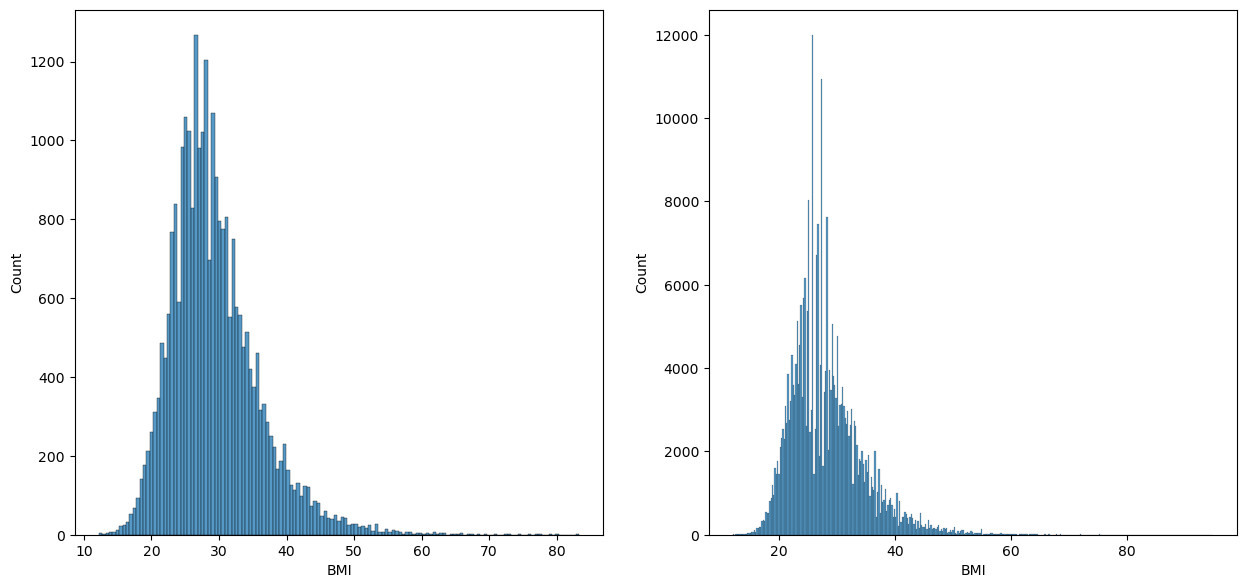

In [51]:
ax = plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.histplot(x='BMI', data=df[df['HeartDisease'] == 'Yes'])

plt.subplot(2, 2, 2)
sns.histplot(x='BMI', data=df[df['HeartDisease'] =='No'])

<Axes: xlabel='Race', ylabel='SleepTime'>

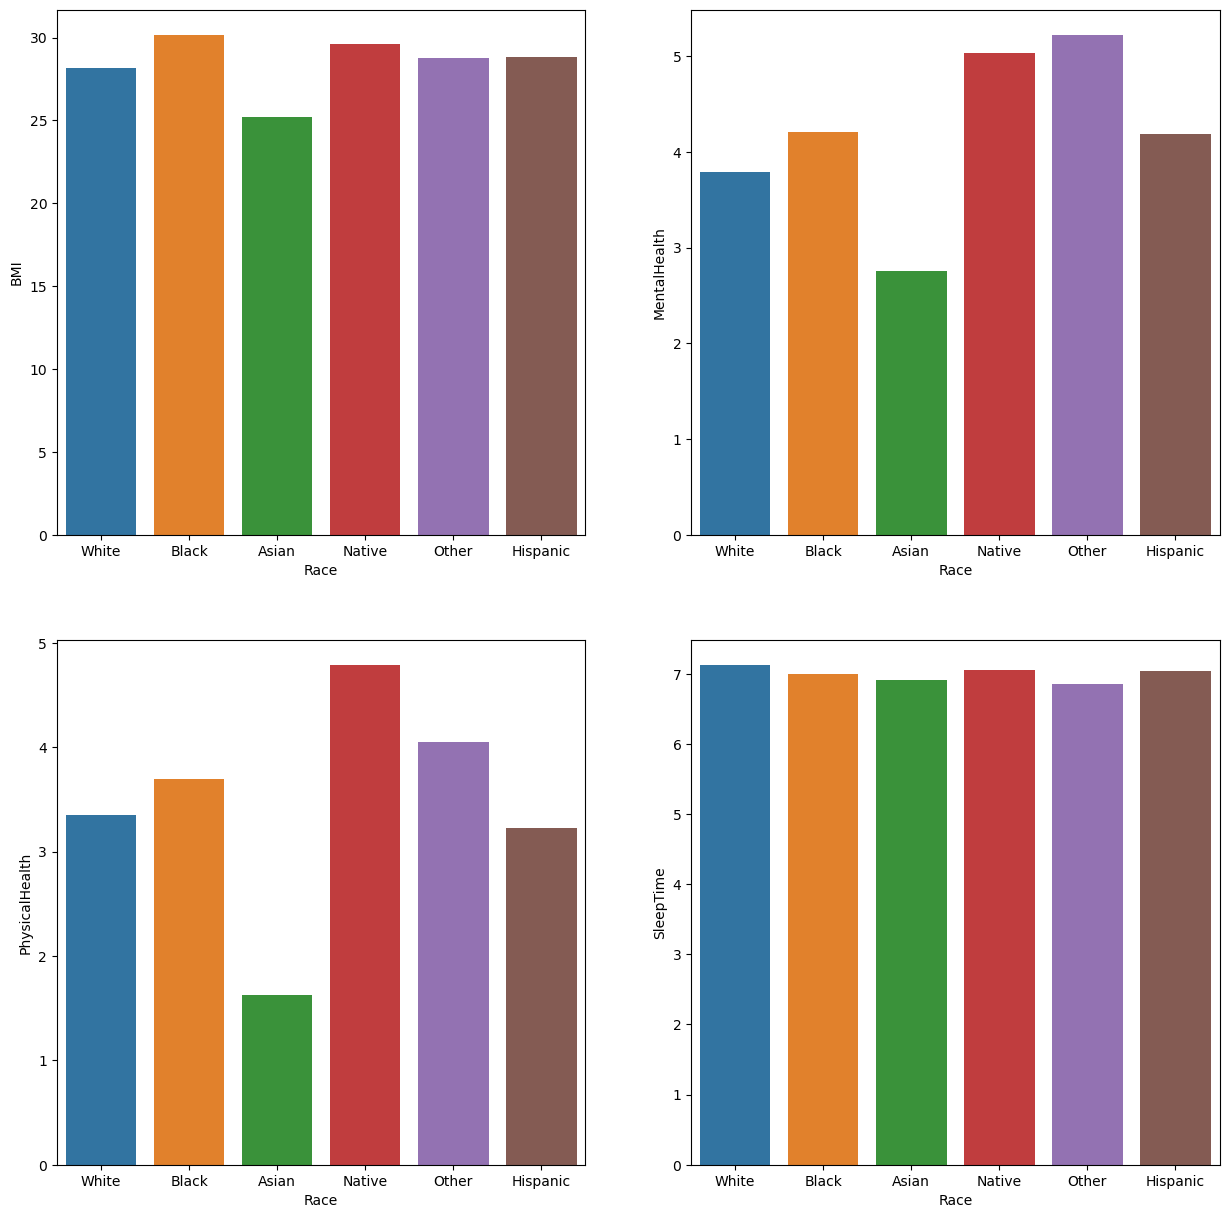

In [52]:
ax = plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.barplot(data=df, x='Race', y='BMI', errorbar=None)

plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Race', y='MentalHealth', errorbar=None)

plt.subplot(2, 2, 3)
sns.barplot(data=df, x='Race', y='PhysicalHealth', errorbar=None)

plt.subplot(2, 2, 4)
sns.barplot(data=df, x='Race', y='SleepTime', errorbar=None)

<Axes: xlabel='Sex', ylabel='SleepTime'>

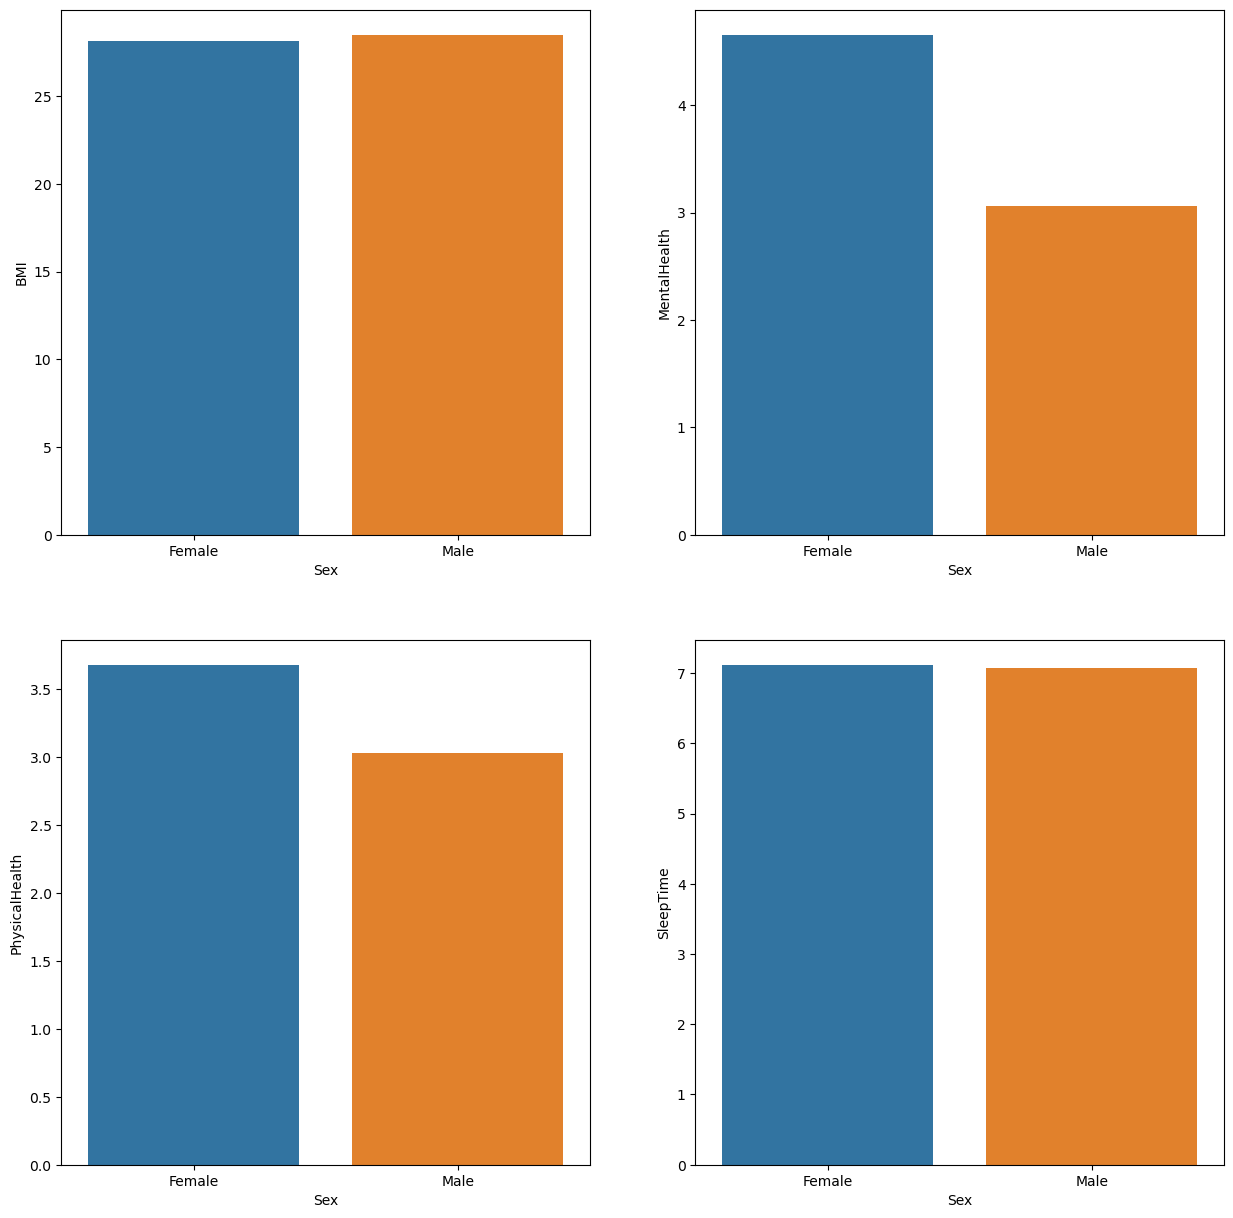

In [53]:
ax = plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.barplot(data=df, x='Sex', y='BMI', errorbar=None)

plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Sex', y='MentalHealth', errorbar=None)

plt.subplot(2, 2, 3)
sns.barplot(data=df, x='Sex', y='PhysicalHealth', errorbar=None)

plt.subplot(2, 2, 4)
sns.barplot(data=df, x='Sex', y='SleepTime', errorbar=None)

<Axes: >

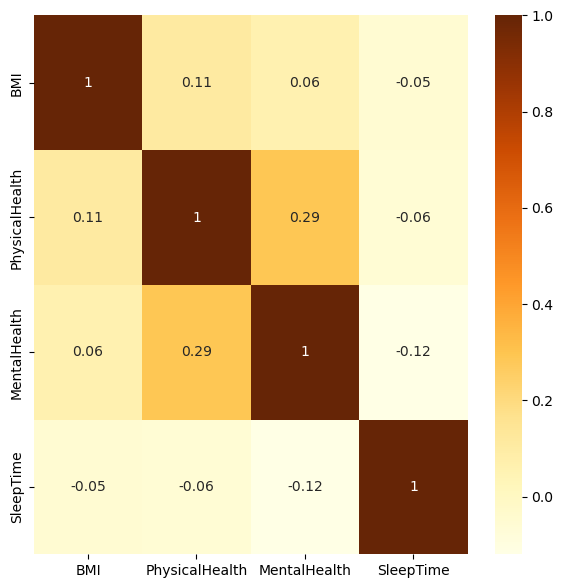

In [54]:
ax = plt.figure(figsize = (7, 7))

corr = df.corr(numeric_only=True).round(2)
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')